In [1]:
# Import thư viện
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# sửa lỗi tải dữ liệu của pandas_datareader
from IPython.display import display
import yfinance as yf
# yf.pdr_override()

In [3]:
# Thiết lập khoảng thời gian và phong cách biểu đồ
sns.set_style('whitegrid')
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021, 1, 1)

# Tải dữ liệu từ Yahoo Finance
# df = web.DataReader('AAPL', start, end)
df = yf.download('AAPL', start=start, end=end)
df = df.xs('AAPL', axis=1, level='Ticker')

/tmp/ipykernel_690/2126878846.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv', parse_dates=True, index_col='Date')

In [5]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,26.796835,26.838363,26.476150,26.716087,115127600
2017-01-04,26.766840,26.879889,26.704549,26.727620,84472400
2017-01-05,26.902962,26.960639,26.718394,26.743772,88774400
2017-01-06,27.202887,27.260564,26.870665,26.942184,127007600
2017-01-09,27.452045,27.553558,27.209802,27.212108,134247600
...,...,...,...,...,...
2020-12-24,128.591049,130.042905,127.743329,127.957698,54930100
2020-12-28,133.190201,133.823552,130.091614,130.559334,124486200
2020-12-29,131.416763,135.236393,130.900335,134.515350,121047300


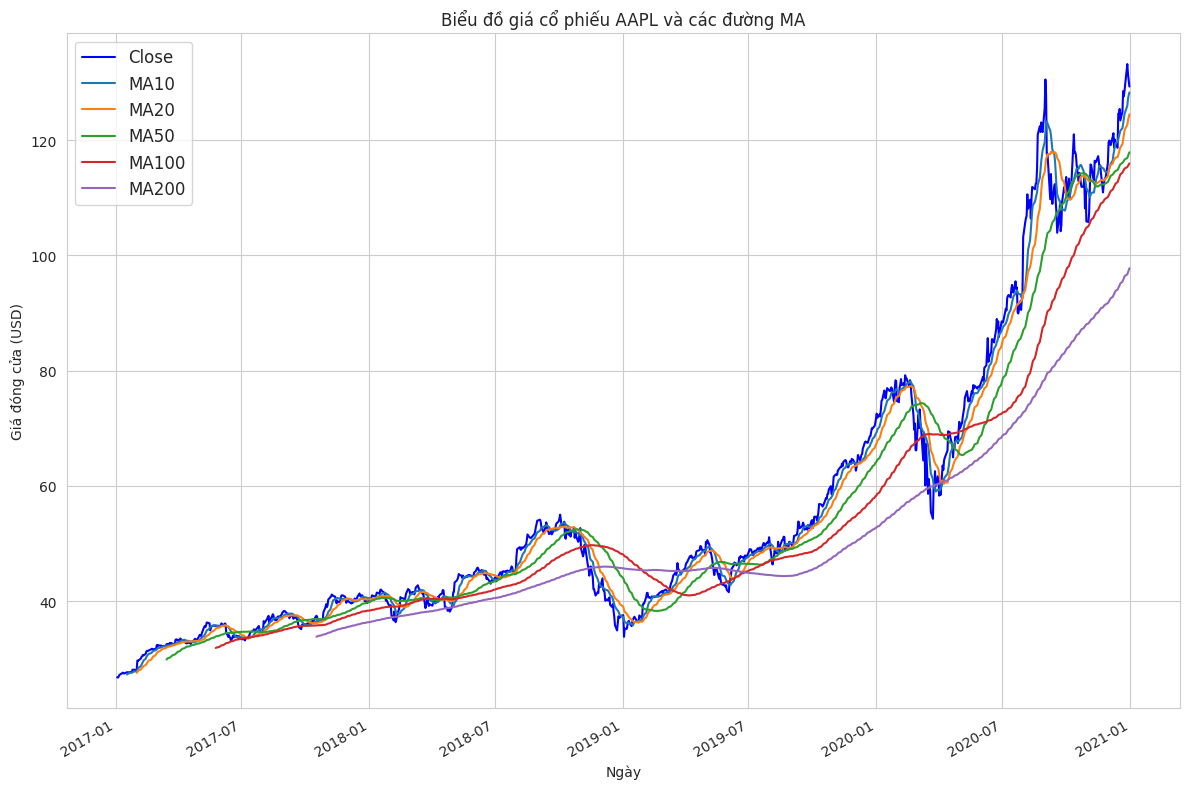

In [6]:
# Làm sạch dữ liệu
df = df.dropna()
df = df[df['Close'] != 0]

# Tính các đường trung bình động
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Vẽ biểu đồ giá đóng cửa và các đường MA
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.plot(df['MA100'], label='MA100')
plt.plot(df['MA200'], label='MA200')

# Thiết lập nhãn và tiêu đề
plt.title('Biểu đồ giá cổ phiếu AAPL và các đường MA')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa (USD)')
plt.legend(loc='upper left', fontsize=12)
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.savefig('AAPL_plot.png', dpi=300)
plt.show()